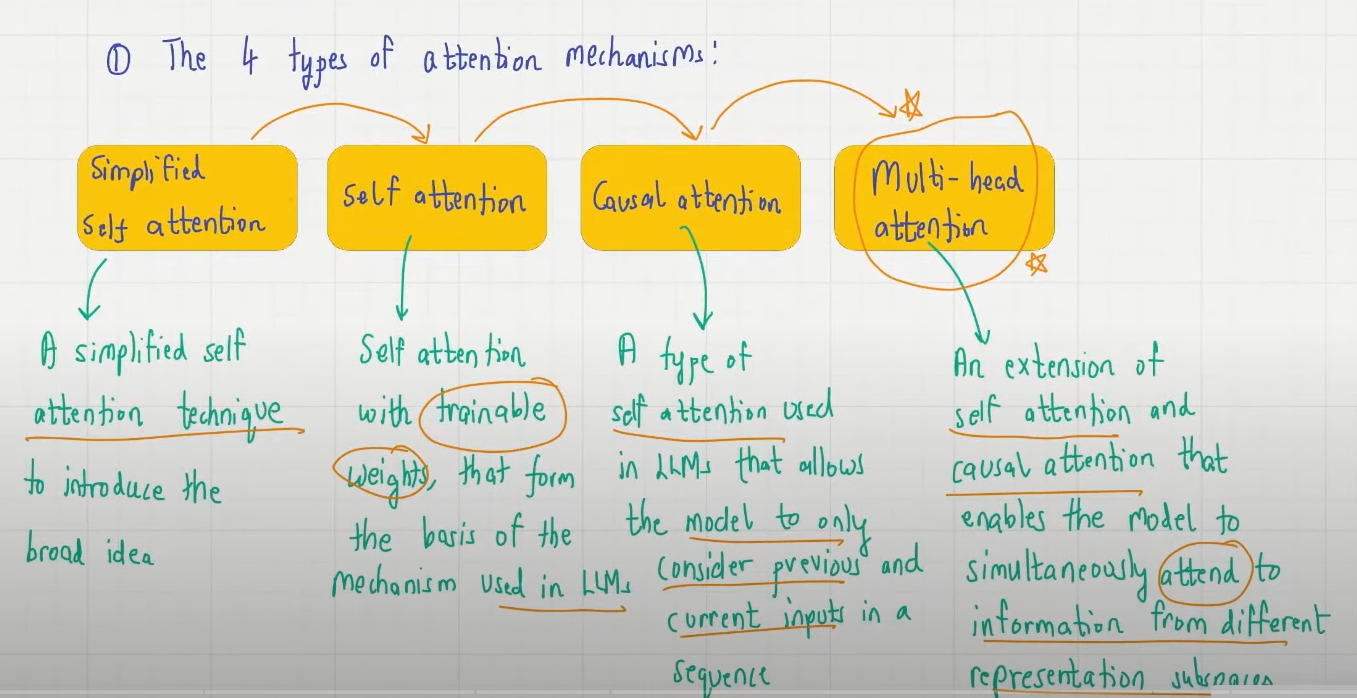

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <h3>Motivation for Attention</h3>
    <ul>
        <li>The attention mechanism is a core concept powering large language models (LLMs) such as GPT and Transformers</li>
        <li>Complex sentences with long-term dependencies (e.g., "The cat that was sitting on the mat which was next to the dog jumped") require understanding which parts of the input are most relevant for generating specific outputs.</li>
        <li>Attention helps models assign focus to the most relevant tokens or words in a sequence (by assigning attention weight to each tokens in sequence), allowing for dynamic selection of context during processing.</li>
    </ul>
    <h3>RNNs and Their Limitations</h3>
    <ul>
        <li>Traditional Recurrent Neural Networks (RNNs) use hidden states to encode memory across sequences</li>
        <li>The encoder processes the input sequentially and passes only the final hidden state to the decoder for output generation, which works well for short sequences but fails for longer ones due to context loss</li>
        <li>The inability of RNN decoders to access earlier hidden states leads to loss of information needed for accurate translation or understanding of long texts</li>
    </ul>
    <h3>Encoder-Decoder Architecture</h3>
    <ul>
        <li>RNN-based sequence models rely on an encoder that summarizes input into a "context vector" (final hidden state), forwarded to a decoder that generates output one word at a time.</li>
        <li>For tasks such as language translation, a simple word-by-word processing fails because different languages have different word orders and grammatical dependencies.</li>
        <li>Effective modeling requires retaining context, grammar alignment, and understanding relationships between words—not just local information</li>
    </ul>
    <h3>Types of Attention Mechanisms</h3>
    <ul>
        <li>Simplified Self Attention: The purest form, helps in understanding the basic principle behind attention.</li>
        <li>Self Attention: Introduces trainable weights, forming the basis for actual LLM attention computation</li>
        <li>Causal Attention: Enables the model to consider only previous and current inputs, masking future inputs—crucial for autoregressive tasks.</li>
        <li>Multi-Head Attention: Combines several attention heads, allowing a model to process multiple parts of the input in parallel and attend to different representation subspaces simultaneously</li>
    </ul>
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <h3>Key Insights</h3>
    <ul>
    <li>RNNs require encoding an entire input into a single hidden state, which fails for long sentences. </li>
    <li>Attention mechanisms give decoders access to all input tokens and let them decide the importance dynamically, leading to superior capturing of long-range dependencies and context. </li>
    <li>Self-attention helps models relate different positions within the same input sequence, essential for generating coherent outputs in LLMs. </li>
    </ul>
</div>



# Simple self attention mechanism without trainable weights

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Vector embedding of each word of  sentence is converted into Context vector. This conext vector can be considered as Enriched vector of that vector embedding which contains details of how that particular word is related to other words of sentence. Each embedding vectors has it's corresponding context vector.
</div>


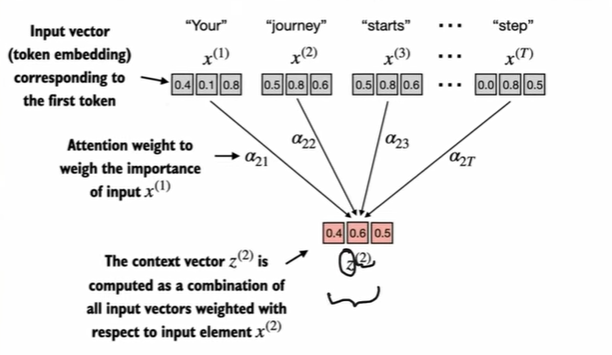

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    While calculating context vector of any input vector embeding, attention weights of all input vectors are used. 
    <br>i.e. (input vector x^(i)) + (attention weights of all input vectors) = context vector of input vector x^(i)
    <br>Same process is followed to calculate context vector for every input vectors
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    For training purpose we're taking  dimensional input vectors. Input vectors are denoted with x(t) and context vector is denoted with z(t) corresponding to that input vector.
<div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">  
    Consider the following input sentence, which has already been embedded into 3- dimensional vectors.<br>
    We choose a small embedding dimension for illustration purposes to ensure it fits on the page without line breaks:
</div>

In [2]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Let's take 2nd element x^(2) --> Corresponing context vector is z^(2). z^(2) is an embedding which contains information about z^(2) and all other input elements x^(1) to x^(T).
</div>

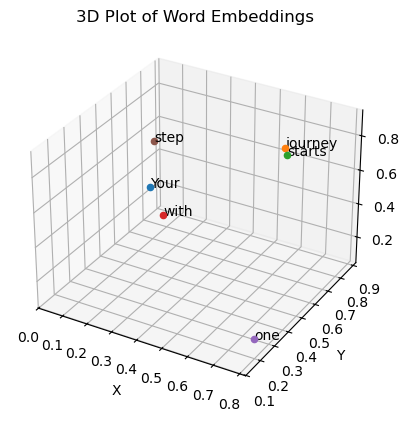

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

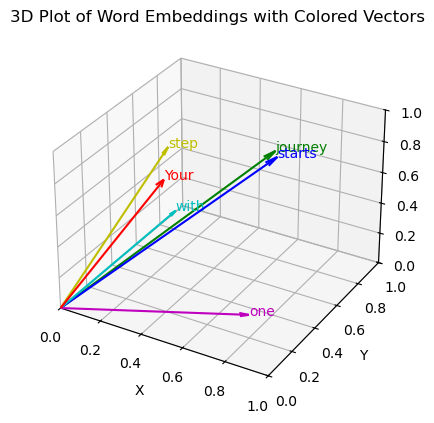

In [4]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <b>Later</b>, we will add trainable weights that help the LLM learn to construct these context vectors, so that they are relevant for the LLM to generate the next token
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    First step of implementing selt-attention is to compute the intermediate value w, also reffered to as attention scores.
    <br><br>
    <b>Attention Score</b>: A mathematical metric to annotate that how much attention should be paid to each other words for <b>the query</b>
</div>

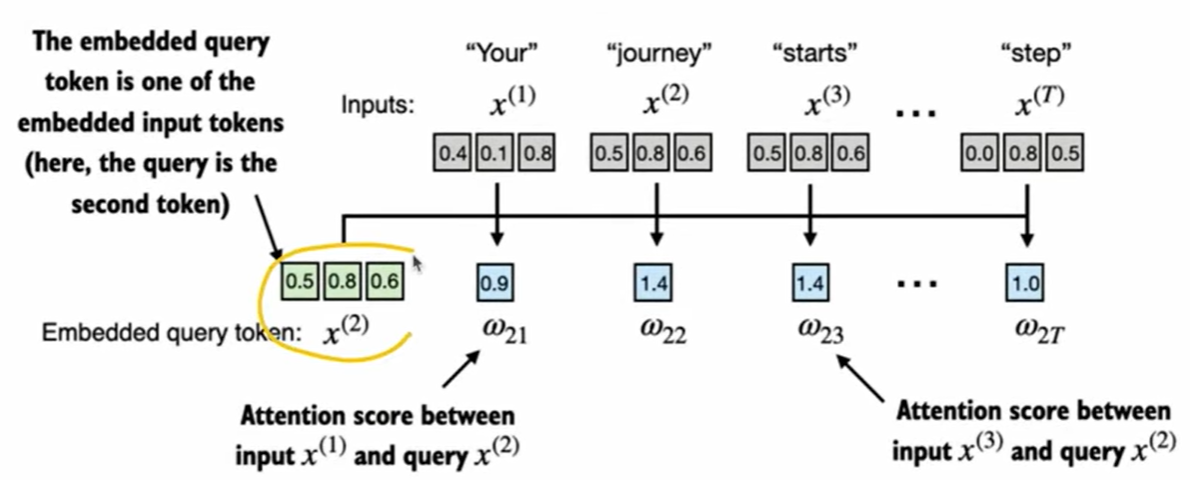

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Attention score for any vector determines how much the query vector and that other vector are aligned to each other. To calculate alignment (attention score) between two vectors we'll use vector dot product (|a|*|b|*cos(theta)). <br>
    Higher the value of dot product of any two embedding vectors, more there aligned to each other. More they're aligned to each other --> lesser the angle between two vectors --> higher the cos value --> higher the dot product.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Each row represents a word, and each column represents an embedding dimension.<br>
    Let's take second input token as an example. The second input token serves as <b>the query</b>
</div>

In [5]:
query = inputs[1]

# Initialize empty tensor with same size of embeding vector which is 3 in this example
# attn_scores_2 = corresponding attention scores of each vectors for 2nd embedding vector
attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    # dot product (transpose not necessary here since they are 1-dim vectors)
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In the next step, we normalize each of the attention scores that we computed previously.
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    The main goal behind the normalization is to obtain attention weights that sum up to 1.<br>
    This normalization is a convention that is useful for interpretation and for maintaining training stability in an LLM.<br>
    Here's a straightforward method for achieving this normalization step:
</div>

In [6]:
#Every attention score will be divided by sum of whole tensor
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


<div style="background-color: #21CC77; color: black; padding: 10px;">
    This method is not efficient when there is large variance between lowest and highest attention score.<br>
    In practice, it's more common and advisable to use the softmax function for normalization.<br>
    This approach is better at managing extreme values and offers more favorable gradient properties during training.<br>
    Below is a basic implementation of the softmax function for normalizing the attention scores:
</div>

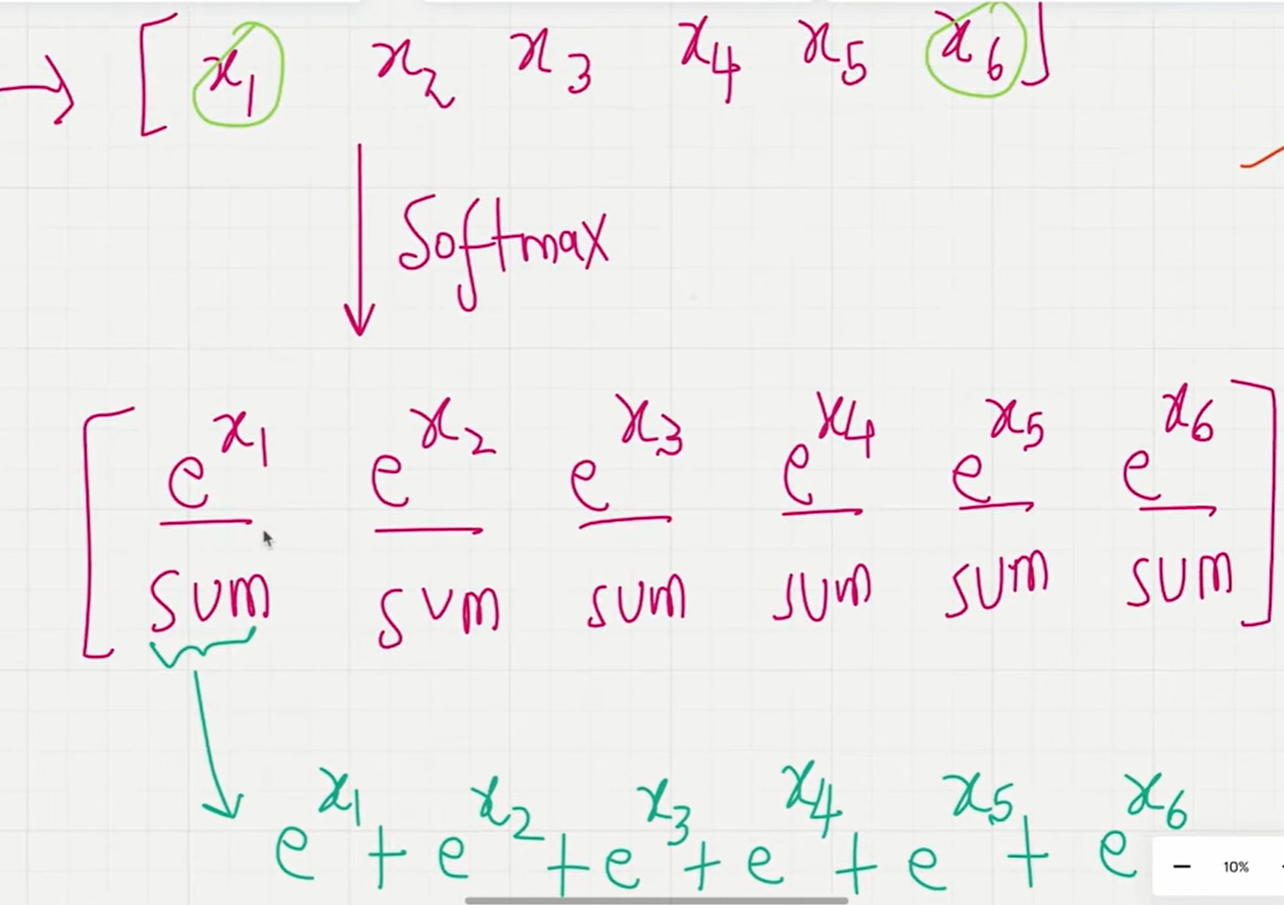

In [7]:
def softmax_naive(x):
    # torch.exp(x) = taking exponential of every element of tensor
    # torch.exp(x).sum(dim=0) = Taking sum of all exponential values of each tensor value, dim=0 denotes 0th row of tensor
    # torch.exp(x)/ torch.exp(x).sum(dim=0) = exponential of each value of tensor is divided by exponential sum
    return torch.exp(x)/ torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    As the output shows, the softmax function also meets the objective and normalizes the attention weights such that they sum to 1:<br>
    <br>
    In addition, the softmax function ensures that the attention weights are always positive. This makes the output interpretable as probabilities or relative importance, where higher weights indicate greater importance.

</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    Note that this naive softmax implementation (softmax_naive) may encounter numerical instability problems, such as overflow and underflow, when dealing with large or small input values.
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    Here's how pyTorch implements softmax algorithm:
</div>

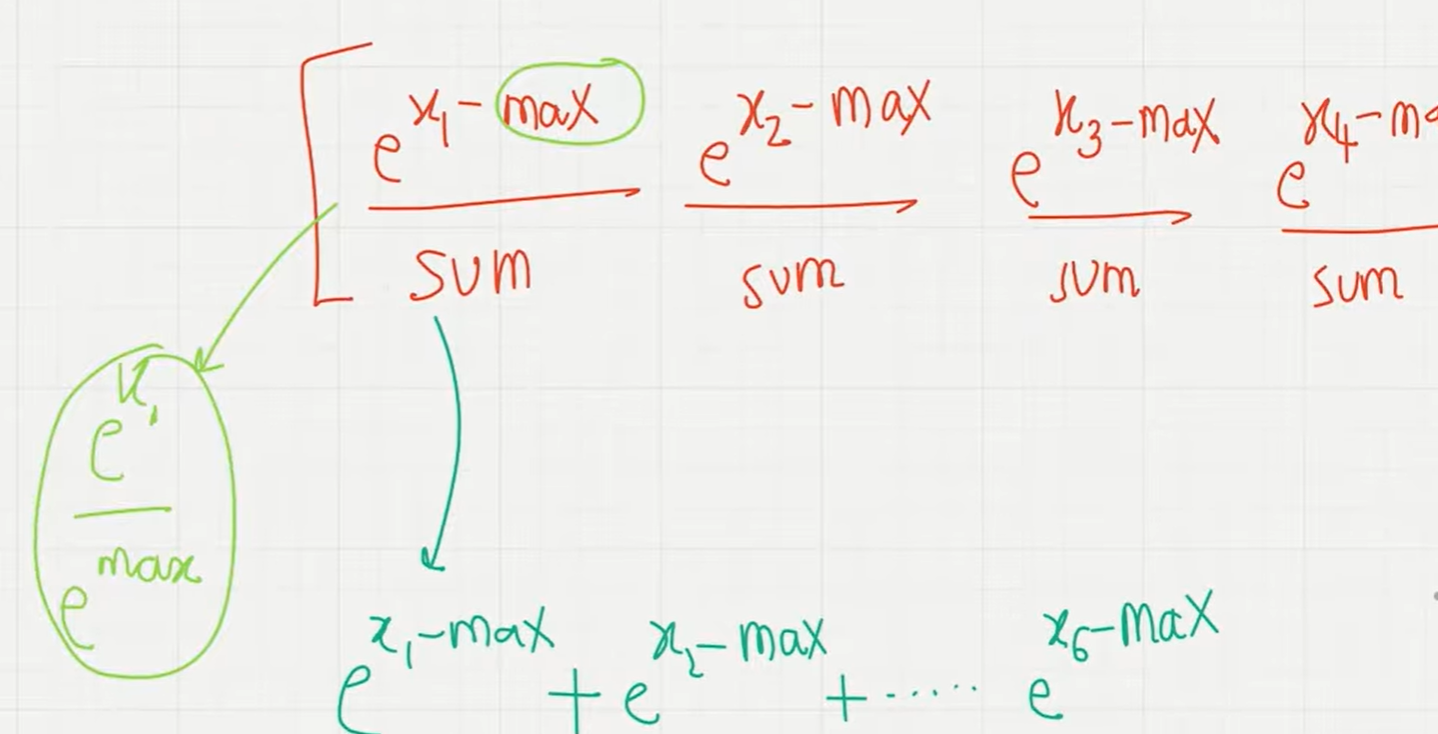

<div style="background-color: #21CC77; color: black; padding: 10px;">
    Therefore, in practice, it's advisable to use the PyTorch implementation of softmax, which has been extensively optimized for performance:
</div>



In [8]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

#In this case, we can see that it yields the same results as our previous softmax_naive function:

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    The context vector z(2)is calculated as a weighted sum of all input vectors. <br><br>
    This involves multiplying each input vector by its corresponding attention weight:
</div>

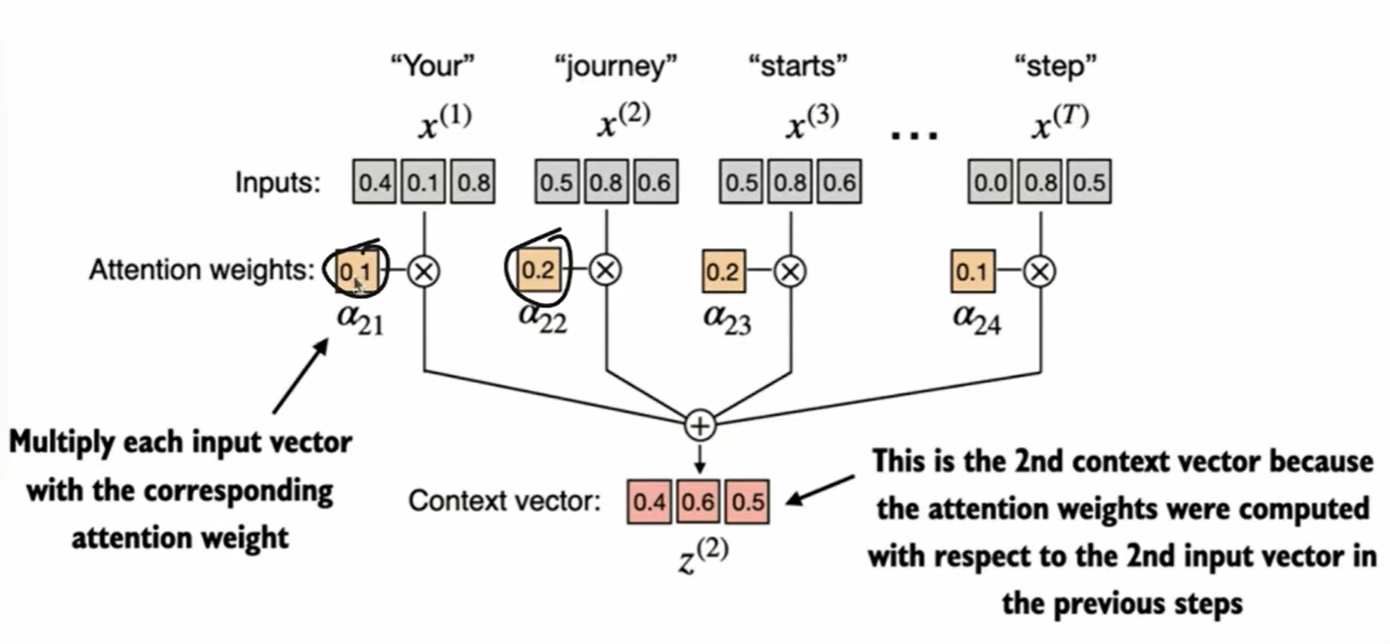

In [9]:
query = inputs[2]

context_vec_2 = torch.zeros(query.shape)

for i,x_i in enumerate(inputs):
    # x_i*attn_weights_2[i] = Multiply each input embeding vector with corresponding attention score
    # context_vec_2 += x_i*attn_weights_2[i] = add each resultant multiplied vector to get final context vector(Enriche vector) for 2nd input vector
    print(x_i*attn_weights_2[i], x_i, attn_weights_2[i])
    context_vec_2 += x_i*attn_weights_2[i]

print(context_vec_2)

tensor([0.0596, 0.0208, 0.1233])

 tensor([0.4300, 0.1500, 0.8900]) tensor(0.1385)
tensor([0.1308, 0.2070, 0.1570]) tensor([0.5500, 0.8700, 0.6600]) tensor(0.2379)
tensor([0.1330, 0.1983, 0.1493]) tensor([0.5700, 0.8500, 0.6400]) tensor(0.2333)
tensor([0.0273, 0.0719, 0.0409]) tensor([0.2200, 0.5800, 0.3300]) tensor(0.1240)
tensor([0.0833, 0.0270, 0.0108]) tensor([0.7700, 0.2500, 0.1000]) tensor(0.1082)
tensor([0.0079, 0.1265, 0.0870]) tensor([0.0500, 0.8000, 0.5500]) tensor(0.1581)
tensor([0.4419, 0.6515, 0.5683])


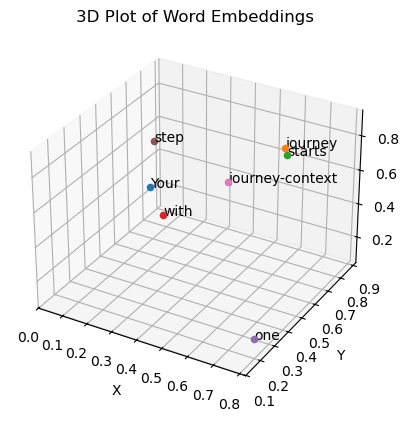

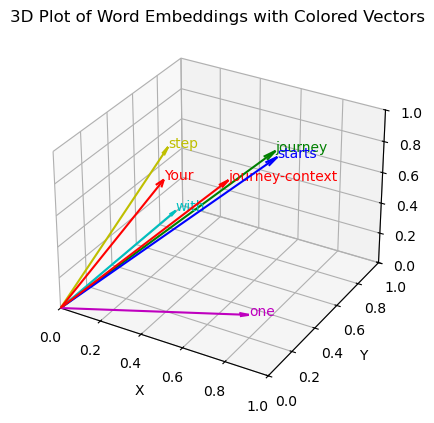

In [10]:
# Plotting context vector of "journey" to get illustration

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs_demo = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs_demo[:, 0].numpy()
y_coords = inputs_demo[:, 1].numpy()
z_coords = inputs_demo[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

<div style="background-color: #21CC77; color: black; padding: 10px;">
    Now, we can extend this computation to calculate attention weights and context vectors for all inputs.
</div>

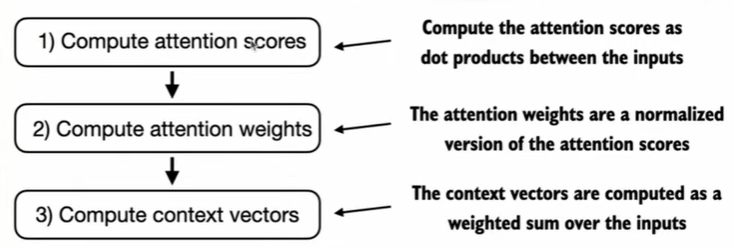

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    First, we add an additional for-loop to compute the dot products for all pairs of inputs.
</div>

In [11]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j,x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)
# row i contains attention score array which was calculated by doing dot product of ith vector with every embedding vector 


tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Image for illustration, how attention score matrix looks
</div>

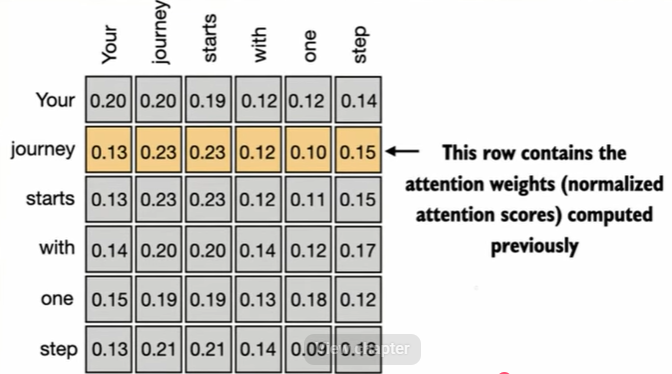

<div style="background-color: #21CC77; color: black; padding: 10px;">
    When computing the preceding attention score tensor, we used for-loops in Python.<br>
    However, for-loops are generally slow, and we can achieve the same results using matrix multiplication:
</div>

In [12]:
# @ = matric multiplication operator proviced by pyTorch
# inputs.T = transpose matrix of inputs matrix
# inputs @ inputs.T = matrix multiplication of inputs and transpose of inputs which will return the same matrix we calculated by using 2 for loops
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    We now normalize each row so that the values in each row sum to 1:
</div>

In [13]:
attn_weights = torch.softmax(attn_scores, dim=-1)

print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In the context of using PyTorch, the dim parameter in functions like torch.softmax specifies the dimension of the input tensor along which the function will be computed.<br><br>
    By setting dim=-1, we are instructing the softmax function to apply the normalization along the last dimension of the attn_scores tensor.<br><br>
    If attn_scores is a 2D tensor (for example, with a shape of [rows, columns]), dim=-1 will normalize across the columns so that the values in each row (summing over the column dimension) sum up to 1.<br><br>
    If dim is passed as -1: While normalization for row i, every columnar values (attn_weights[i][0-j]) will be normalized
</div>

In [14]:
# Let's briefly verify that the rows indeed all sum to 1:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<div style="background-color: #21CC77; color: black; padding: 10px;">
    In the third and last step, we now use these attention weights to compute all context vectors via matrix multiplication:
</div>

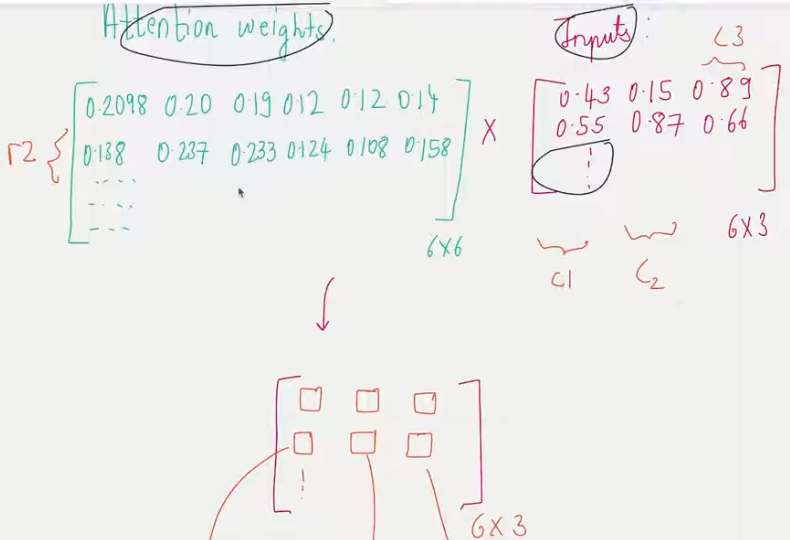

In [15]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [16]:
# We can double-check that the code is correct by comparing the 2nd row with the context vector z(2) calculated previously
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


<div style="background-color: #21CC77; color: black; padding: 10px;">
    <b>Summarising Whole Process of Self attention mechanism without trainable weights:</b><br>
    <ol>
    <li>Multiply input matrix with transpose of input matrix (which is same as doing dot product of one input embedding with all other embedding vectors) to get <b>attention scores</b> matrix.</li>
    <li>Normalize attention scores by passing it to softmax function to get <b>attention weights</b>.</li>
    <li>Now multiply attention weight matrix with inputs matrix to get context vectors.</li>
    </ol>
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    It may be possible that to words are not aligning with each other while calculating attention score but the other word should be paid more attention while calculating context vector.<br><br>
    Example:<br>
    Sentence : "The cat sat on the mat because it was warm."<br>
    Here if we calculate context vector of "mat", it seems that "warm" is not that much similar to "mat". But if we understand the whole meaning of sentence, cat sat on the "mat" because it was "warm". That's why "warm" should be paid more attention.<br>
    This is the limitation we encounter <b>if we don't use trainable weights</b>.<br>
</div>

<h1>Self attention mechanism with trainable weights (key, query and value)</h1>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    In this section, we will learn about the self attention mechanism used in the original transformers architecture, GPT models and other popular LLMs.<br>
    <br>
    This self attention mechanism is also called <b>Scaled dot-product attention</b>
</div>

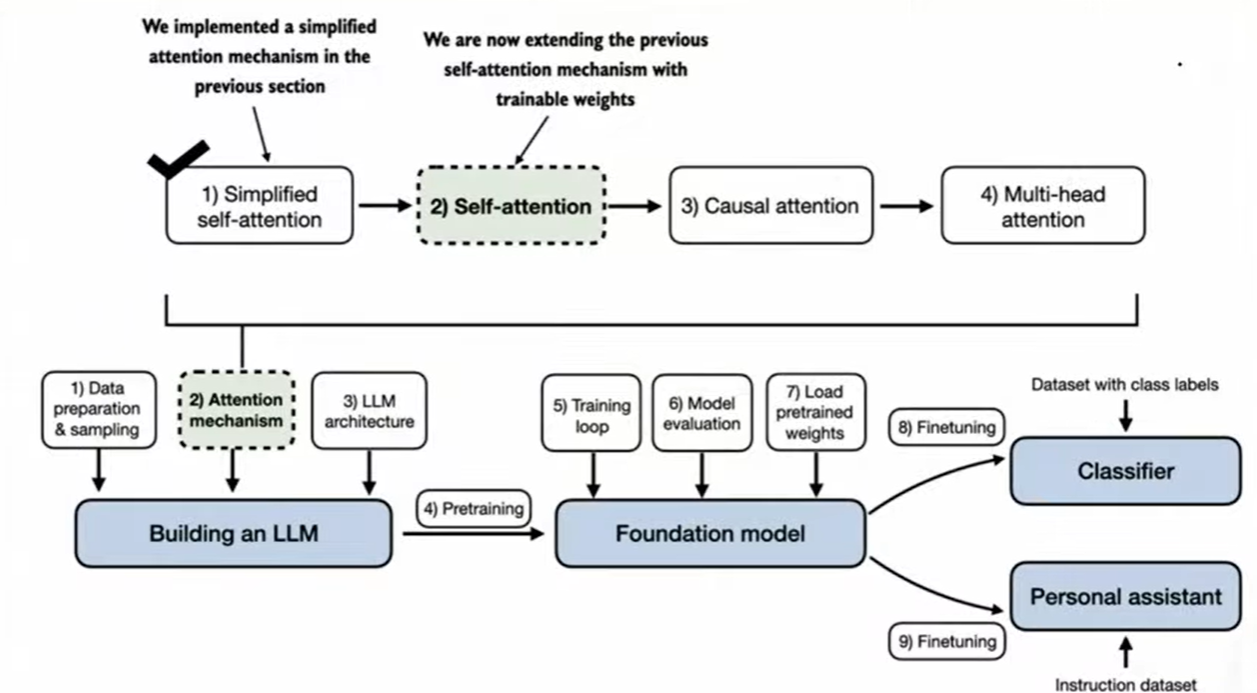

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
    <li>We want to compute context vectors as weighted sums over the input vectors specific to a certain input element</li>
    <li>We will introduce weight matrices that are updated during model training.</li>
    <li>These trainable weight matrices are crucial so that the model can learn to produce "good" context vectors.</li>
    <li>We will implement the self attention mechaism step by step by intoducing 3 tarainable weight matrices: <b>Wq, Wk, Wv</b>. These  matrices are used to project the embedded input token x(i) into query, key and value vectors</li>
    <li>Wq = Query weight matrix, Wk = Key weight matrix, Wv = Value weight matrix</li>
    </ul>
</div>

<h4>Converting input embeddings into key, query, value vectors</h4>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    3 tarinable weight matrices are initialized randomly and optimized during training process, that's why they are called trainable weight matrices. By multiplying trainable weight matrices to input matrix, we can project input matrix to different dimensional space.
</div>

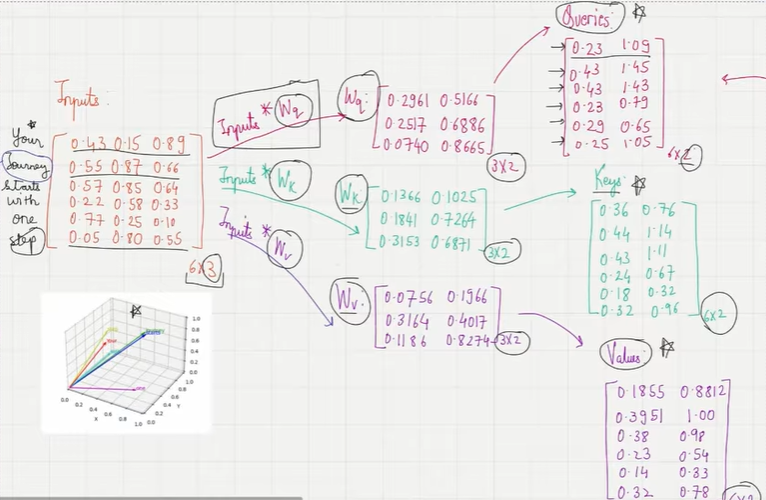

In [17]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Let's begin by defining a few variables:<br>
    A. The second input element<br>
    B. The input embedding size, d=3 (size of input vector to make trainable weight matrices multiplyable with input matrix)<br>
    C. The output embedding size, d_out=2
</div>

In [18]:
x_2 = inputs[1] #A
d_in = inputs.shape[1] #B
d_out = 2 #C

print(x_2)

tensor([0.5500, 0.8700, 0.6600])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Note that in GPT-like models, the input and output dimensions are usually the same.<br>
    But for illustration purposes, to better follow the computation, we choose different input (d_in=3) and output (d_out=2) dimensions here.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Next, we initialize the three weight matrices Wq, Wk and Wv
</div>

In [19]:
torch.manual_seed(123)
w_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
w_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
w_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

print(w_query)
print(w_key)
print(w_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Note that we are setting requires_grad=False to reduce clutter in the outputs for illustration purposes.If we were to use the weight matrices for model training, we would set requires_grad=True to update these matrices during model training.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Next, we compute the query, key, and value vectors as shown earlier
</div>

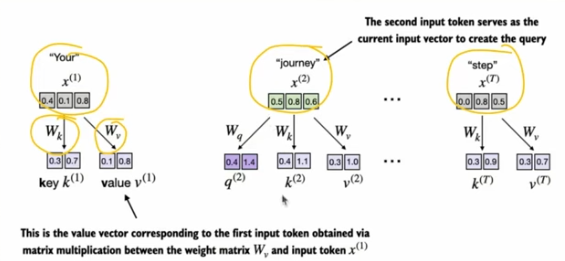

In [20]:
query_2 = x_2 @ w_query
key_2 = x_2 @ w_key
value_2 = x_2 @ w_value

print(query_2)

tensor([0.4306, 1.4551])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    As we can see based on the output for the query, this results in a 2-dimensional vector.<br>
    This is because: we set the number of columns of the corresponding weight matrix, via d_out, to 2:
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Even though our temporary goal is to only compute the one context vector z(2), we still require the key and value vectors for all input elements.<br>
    This is because they are involved in computing the attention weights with respect to the query q(2)
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    We can obtain all keys and values via matrix multiplication:
</div>

In [21]:
keys = inputs @ w_key
values = inputs @ w_value
queries = inputs @ w_query
print("keys.shape:", keys.shape)

print("values.shape:", values.shape)

print("queries.shape:", queries.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Now we will compute only one context vector z^2 for illustration purpose
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Mathematical Intution: We have to find attention score between query and key of other words.
</div>

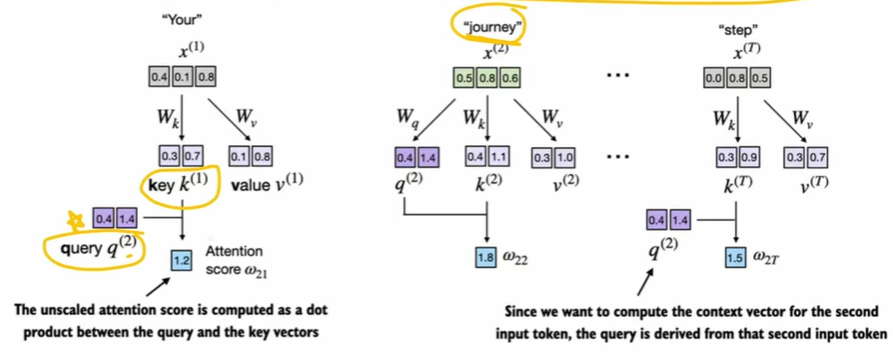

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    First, let's compute the attention score ω22
</div>

In [22]:
keys_2 = keys[1] #A
attn_scores_22 = query_2.dot(keys_2)
print(attn_scores_22)

tensor(1.8524)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Again, we can generalize this computation to all attention scores via matrix multiplication:
</div>

In [23]:
attn_scores_2 = query_2 @ keys.T #All attention scores via matrix multiplication
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [24]:
#Compute attention scores for all queries by doing matrix multiplication
attn_scores = queries @ keys.T # omega
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


<div style="background-color: #21CC77; color: black; padding: 10px;">
    Now we will compute attention weights from attention scores.<br>
    Normalized value of attention score is called attention weights.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    We compute the attention weights by scaling the attention scores and using the softmax function we used earlier. <br>
    The difference to earlier is that we now scale the attention scores by dividing them by the square root of the embedding dimension of the keys. Here dimension of keys of inputs is 2. So attention score will be divided by suare root of 2.<br>
    Note that taking the square root is mathematically the same as exponentiating by 0.5:
</div>

In [25]:
d_k = keys.shape[-1] #Get dimension of key for input embeddings

#Calculate softmax of attention scores after diviing it by suare root of dimension of key
attn_weights_2 = torch.softmax(attn_scores_2/d_k**0.5, dim=-1)
#Attention weight for all inputs
attn_weights = torch.softmax(attn_scores/d_k**0.5, dim=-1)

print(attn_weights)
print(attn_weights_2)
print(d_k)


tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


<h4>WHY DIVIDE BY SQRT(DIMENSION)</h4>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Reason 1: For stability in learning<br><br>
    The softmax function is sensitive to the magnitudes of its inputs. When the inputs are large, the differences between the exponential values of each input become much more pronounced. This causes the softmax output to become "peaky," where the highest value receives almost all the probability mass, and the rest receive very little.<br><br>
    In attention mechanisms, particularly in transformers, if the dot products between query and key vectors become too large (like multiplying by 8 in this example), the attention scores can become very large. This results in a very sharp softmax distribution, making the model overly confident in one particular "key." Such sharp distributions can make learning unstable,
</div>

In [26]:
import torch

# Define the tensor
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

# Apply softmax without scaling
softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling:", softmax_result)

# Multiply the tensor by 8 and then apply softmax
scaled_tensor = tensor * 8
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling (tensor * 8):", softmax_scaled_result)

Softmax without scaling: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor * 8): tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


<h4>BUT WHY SQRT?</h4>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Reason 2: To make the variance of the dot product stable<br>
    <br>
    The dot product of Q and K increases the variance because multiplying two random numbers increases the variance.<br>
    <br>
    The increase in variance grows with the dimension.<br>
    <br>
    Dividing by sqrt(dimension) keeps the variance close to 1
</div>

In [27]:
import numpy as np

# Function to compute variance before and after scaling
def compute_variance(dim, num_trials=1000):
    dot_products = []
    scaled_dot_products = []

    # Generate multiple random vectors and compute dot products
    for _ in range(num_trials):
        q = np.random.randn(dim)
        k = np.random.randn(dim)
        
        # Compute dot product
        dot_product = np.dot(q, k)
        dot_products.append(dot_product)
        
        # Scale the dot product by sqrt(dim)
        scaled_dot_product = dot_product / np.sqrt(dim)
        scaled_dot_products.append(scaled_dot_product)
    
    # Calculate variance of the dot products
    variance_before_scaling = np.var(dot_products)
    variance_after_scaling = np.var(scaled_dot_products)

    return variance_before_scaling, variance_after_scaling

# For dimension 5
variance_before_5, variance_after_5 = compute_variance(5)
print(f"Variance before scaling (dim=5): {variance_before_5}")
print(f"Variance after scaling (dim=5): {variance_after_5}")

# For dimension 20
variance_before_100, variance_after_100 = compute_variance(100)
print(f"Variance before scaling (dim=100): {variance_before_100}")
print(f"Variance after scaling (dim=100): {variance_after_100}")

Variance before scaling (dim=5): 5.175617737203826
Variance after scaling (dim=5): 1.035123547440765
Variance before scaling (dim=100): 95.49499151890696
Variance after scaling (dim=100): 0.9549499151890698


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    We now compute the context vector as a weighted sum over the value vectors.<br>
    Here, the attention weights serve as a weighting factor that weighs the respective importance of each value vector.<bt>
    We can use matrix multiplication to obtain the output in one step:<br>
</div>

In [28]:
context_vec_2 = attn_weights_2 @ values
print(attn_weights_2)
print(values)
print(context_vec_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])
tensor([0.3061, 0.8210])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    So far, we only computed a single context vector, z(2).<br>
    In the next section, we will generalize the code to compute all context vectors in the input sequence, z(1)to z (T)
</div>

<h4>IMPLEMENTING A COMPACT SELF ATTENTION PYTHON CLASS</h4>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In the previous sections, we have gone through a lot of steps to compute the self-attention outputs.<br>
    This was mainly done for illustration purposes so we could go through one step at a time.<br>
    In practice, with the LLM implementation in the next chapter in mind, it is helpful to organize this code into a Python class as follows:<br>
</div>

In [29]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    
    def __init__(self, d_in, d_out):
        super().__init__()
        self.w_query = nn.Parameter(torch.rand(d_in, d_out))
        self.w_key = nn.Parameter(torch.rand(d_in, d_out))
        self.w_value = nn.Parameter(torch.rand(d_in, d_out))
    
    def forward(self, x):
        #Forard Pass:
        #Neural network models in frameworks like PyTorch inherit from a base Module class, and the core logic of how data flows through the network 
        #is defined in the "forward" method. This method takes the input data as an argument and performs the necessary computations to produce an output.
        queries = x @ self.w_query
        keys = x @ self.w_key
        values = x @ self.w_value

        attn_scores = queries @ keys.T #omega
        attn_weights = torch.softmax( attn_scores/keys.shape[-1] , dim=-1)
        context_vec = attn_weights @ values

        return context_vec


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In this PyTorch code, SelfAttention_v1 is a class derived from nn.Module, which is a fundamental building block of PyTorch models, which provides necessary functionalities for model layer creation and management.<br><br>
    The init method initializes trainable weight matrices (W_query, W_key, and W_value) for queries, keys, and values, each transforming the input dimension d_in to an output dimension d_out.<br><br>
    During the forward pass, using the forward method, we compute the attention scores (attn_scores) by multiplying queries and keys, normalizing these scores using softmax.<br><br>
    Finally, we create a context vector by weighting the values with these normalized attention scores.
</div>

In [30]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2940, 0.7919],
        [0.2988, 0.8038],
        [0.2986, 0.8032],
        [0.2905, 0.7834],
        [0.2890, 0.7799],
        [0.2936, 0.7909]], grad_fn=<MmBackward0>)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Since inputs contains six embedding vectors, we get a matrix storing the six context vectors, as shown in the above result.<br>
    As a quick check, notice how the second row ([0.3061, 0.8210]) matches the contents of context_vec_2 in the previous section.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's nn.Linear layers, which effectively perform matrix multiplication when the bias units are disabled.<br>
    Additionally, a significant advantage of using nn.Linear instead of manually implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight initialization scheme, contributing to more stable and effective model training.
</div>

In [31]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    
    def forward(self, x):
        # Multiply input matrix with w_query, w_key and w_values to get queries, keys and values
        queries = self.w_query(x)
        keys = self.w_key(x)
        values = self.w_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values

        return context_vec

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    You can use the SelfAttention_v2 similar to SelfAttention_v1:
</div>

In [32]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


<div style="background-color: #21CC77; color: black; padding: 10px;">
    Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they use different initial weights for the weight matrices since nn.Linear uses a more sophisticated weight initialization scheme.
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    <b>Summarising Whole Process of Self attention mechanism with trainable weights:</b><br>
    <ol>
    <li>Initialize <b>Wq (trainable query matrix)</b>, <b>Wk (trainable key matrix)</b> and <b>Wv (trainable value matrix)</b> matrices with random values. These are trainable weight matrices.</li>
    <li>Multiply Input matrix with Wq, Wk and Wv which are trainable weight matrices to get <b>queries</b>, <b>keys</b> and <b>values</b>. Now in further process queries, keys and values will be used to  calculate context vectors.</li>
    <li>Now queries matrix will be multiplied with transpose of keys matrix (dot product) to get <b>attention scores</b> for every inputs.</li>
    <li>Now to normalize attention scores, attention scores matrix will be divided by square root of dimsension of key sqrt(d_key) (To keep variance of attention weights close to 1) and then it'll be passed to softmax. Which will give <b>attention weights</b>. Here if dimension of keys matrix is 6*2 then d_keys=2.</li>
    <li>Now multiply attention weights matrix with values matrix to get <b>context vectors</b>.</li>
    </ol> 
</div>

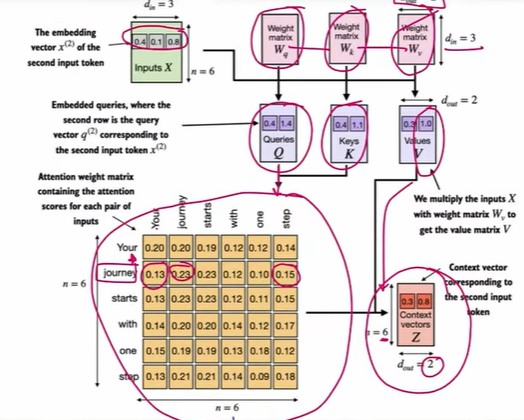

<h4>Why do we use the terms: key, query and value?</h4>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    <ul>
        <li><b>Query</b>: Analogues to search query in a database. It represents the current token the model focuses on.</li>
        <li><b>Key</b>: In attention mechanism, each item in input sequence has a key. Keys are used to match (map) with the query.</li>
        <li><b>Value</b>: It represents the actual content or representation of the input items. Once the model determines which keys (which parts of the input) are most relevant to the query (current focus item), it retrieves the corresponding values.</li>
    </ul>
</div>

<h1>Causal Attention</h1>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li><b>Causal attention</b>, also known as masked attention is a special form of self attention.</li>
        <li>It restricts the model to only consider previous and current inputs in a sequence, when processing any given token.</li>
        <li>This is in contrast to the self attention mechanism, which allows access to the entire input sequnce at once.</li>
        <li>When computing attention scores, the causal attention mechanism ensures that the model only factors in tokens that occur at or before the current token.</li>
        <li>To achieve this in GPT like LLMs, for each token processed, we mask out the future tokens, which come after the current token in the input text.</li>
        <li>In image below, you can see that we mask out the attention weights above the diagonal, and then we normalize the non masked attention wights, such that the attention weights sum upto 1 in each row.</li>
    </ul>
</div>

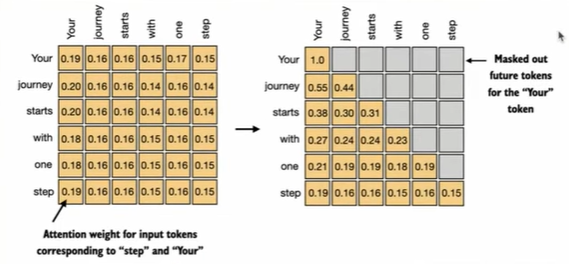
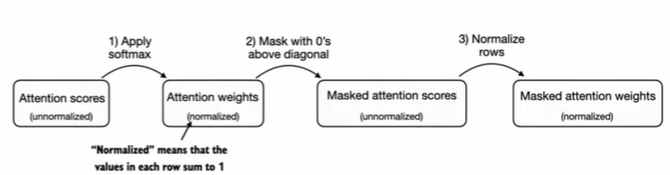

<h3>HIDING FUTURE WORDS WITH CAUSAL ATTENTION</h3>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Let's work with the attention scores and weights from the previous section to code the causal attention mechanism.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Reuse the query and key weight matrices of the SelfAttention_v2 object from the previous section for convenience
</div>

In [33]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [34]:
d_in = inputs.shape[1] #B
d_out = 2 #C

sa_v2 = SelfAttention_v2(d_in, d_out)

queries = sa_v2.w_query(inputs) #A
keys = sa_v2.w_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores/ keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1766, 0.1701, 0.1699, 0.1597, 0.1618, 0.1620],
        [0.1772, 0.1720, 0.1717, 0.1580, 0.1596, 0.1615],
        [0.1769, 0.1719, 0.1716, 0.1582, 0.1597, 0.1616],
        [0.1725, 0.1696, 0.1695, 0.1618, 0.1627, 0.1638],
        [0.1687, 0.1694, 0.1692, 0.1637, 0.1634, 0.1656],
        [0.1758, 0.1704, 0.1702, 0.1598, 0.1615, 0.1623]],
       grad_fn=<SoftmaxBackward0>)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    We can now use PyTorch's tril function to create a mask where the values above the diagonal are zero:
</div>

In [35]:
context_length = attn_scores.shape[0]
# context_length is the number of words LLM can look before predicting next word
print(context_length)

# torch.tril will create an upper triangular matrix in which elements above diagonal will be set to 0
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(torch.ones(context_length, context_length))
print(mask_simple)

6
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Now, we can multiply this mask with the attention weights to zero out the values above the diagonal:
</div>

In [36]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1766, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1772, 0.1720, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1769, 0.1719, 0.1716, 0.0000, 0.0000, 0.0000],
        [0.1725, 0.1696, 0.1695, 0.1618, 0.0000, 0.0000],
        [0.1687, 0.1694, 0.1692, 0.1637, 0.1634, 0.0000],
        [0.1758, 0.1704, 0.1702, 0.1598, 0.1615, 0.1623]],
       grad_fn=<MulBackward0>)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    The third step is to renormalize the attention weights to sum up to 1 again in each row.<br>
    We can achieve this by dividing each element in each row by the sum in each row:
</div>

In [37]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
print(row_sums)

masked_simple_norm = masked_simple/row_sums
print(masked_simple_norm)

tensor([[0.1766],
        [0.3492],
        [0.5205],
        [0.6735],
        [0.8344],
        [1.0000]], grad_fn=<SumBackward1>)
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5075, 0.4925, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3399, 0.3303, 0.3298, 0.0000, 0.0000, 0.0000],
        [0.2562, 0.2519, 0.2517, 0.2402, 0.0000, 0.0000],
        [0.2021, 0.2030, 0.2028, 0.1962, 0.1959, 0.0000],
        [0.1758, 0.1704, 0.1702, 0.1598, 0.1615, 0.1623]],
       grad_fn=<DivBackward0>)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    The result is an attention weight matrix where the attention weights above the diagonal are zeroed out and where the rows sum to 1.
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    <b>Note:</b> Though we've zeroed out future tokens. It does not mean that non zero attention weights don't have any influence of future tokens.<br>
    Before zeroing out attn_weights: As we've applied softmax on attn_scores matrix, generated attn_weight matrix is already affected by future tokens as each attn_score in any row is divided by exponential of sum of that row.<br>
    <br>
    This is called <b>Data leakage</b> problem.
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    More effiecient way:<br>
    <b>Attention Score ---> Upper triangular infinity mask ---> Softmax</b>
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    While we could be technically done with implementing causal attention at this point, we can take advantage of a mathematical property of the softmax function. <br>
    We can implement the computation of the masked attention weights more efficiently in fewer steps.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    The softmax function converts its inputs into a probability distribution.<br>
    When negative infinity values (-∞) are present in a row, the softmax function treats them as zero probability.<br>
    (Mathematically, this is because e -∞ approaches 0.)<br>
    We can implement this more efficient masking "trick" by creating a mask with 1's above the diagonal and then replacing these 1's with negative infinity (-inf) values:
</div>

In [38]:
print(attn_scores)

# First initialize an upper triangular matrix. diagonal=1 set diagonal to 0.
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(mask)

# mask.bool() will set True where cell value is 1 and False where cell value is 0
# masked_fill() function accepts mask tensor as first argument which contains True/False values and any number as second argument
# In attn_scores.masked_fill(mask.bool(), -torch.inf), for attn_scores tensor, masked_fill function will set those cells(indexes) as -infinity which
#   are True in mask.bool() matrix and other cells(indexes) will not be modified which are False in mask.bool(). 
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)


tensor([[0.2118, 0.1588, 0.1574, 0.0699, 0.0885, 0.0899],
        [0.2676, 0.2249, 0.2226, 0.1051, 0.1195, 0.1361],
        [0.2622, 0.2215, 0.2193, 0.1038, 0.1175, 0.1344],
        [0.1496, 0.1257, 0.1244, 0.0587, 0.0668, 0.0760],
        [0.0926, 0.0984, 0.0972, 0.0506, 0.0479, 0.0662],
        [0.2108, 0.1664, 0.1649, 0.0754, 0.0907, 0.0973]],
       grad_fn=<MmBackward0>)
tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[0.2118,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.2676, 0.2249,   -inf,   -inf,   -inf,   -inf],
        [0.2622, 0.2215, 0.2193,   -inf,   -inf,   -inf],
        [0.1496, 0.1257, 0.1244, 0.0587,   -inf,   -inf],
        [0.0926, 0.0984, 0.0972, 0.0506, 0.0479,   -inf],
        [0.2108, 0.1664, 0.1649, 0.0754, 0.0907, 0.0973]],
       grad_fn=<MaskedFillBackward0>)


In [39]:
# Now, all we need to do is apply the softmax function to these masked results, and we are done.
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

# As we can see based on the output, the values in each row sum to 1, and no further normalization is necessary.

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5075, 0.4925, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3399, 0.3303, 0.3298, 0.0000, 0.0000, 0.0000],
        [0.2562, 0.2519, 0.2517, 0.2402, 0.0000, 0.0000],
        [0.2021, 0.2030, 0.2028, 0.1962, 0.1959, 0.0000],
        [0.1758, 0.1704, 0.1702, 0.1598, 0.1615, 0.1623]],
       grad_fn=<SoftmaxBackward0>)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Masking in Transformers sets scores for future tokens to a large negative value, making their influence in the softmax calculation effectively zero.<br>
    The softmax function then recalculates attention weights only among the unmasked tokens.<br>
    This process ensures no information leakage from masked tokens, focusing the model solely on the intended data.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    We could now use the modified attention weights to compute the context vectors via context_vec = attn_weights @ values.<br>
    However, in the next section, we first cover another minor tweak to the causal attention mechanism that is useful for reducing overfitting when training LLMs.
</div>

<h3>MASKING ADDITIONAL ATTENTION WEIGHTS WITH DROPOUT</h3>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li>Dropout is a deep learning technique where randomly selected hidden layer units are ignored during training</li>
        <li>This prevents overfitting and improves generalization performance.</li>
        <li>In transformer architecture, including models like GPT, dropout in the attention mechanism is applied in 2 specific areas.<br> 1. After calculating attention scores 2. After applying attention weights to value vector </li>
        <li>Applying dropout after calcuting attention weights is common, and we consider that</li>
    </ul>
</div>

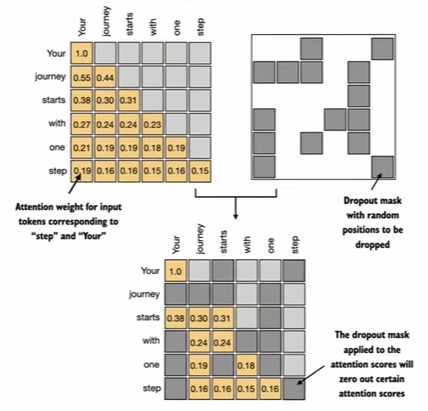

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In the following code example, we use a dropout rate of 50%, which means masking out half of the attention weights.<br>
    When we train the GPT model in later chapters, we will use a lower dropout rate, such as 0.1 or 0.2.<br>
    In the following code, we apply PyTorch's dropout implementation first to a 6×6 tensor consisting of ones for illustration purposes:
</div>

In [40]:
example = torch.ones(6, 6) #B
print(example)

torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    When applying dropout to an attention weight matrix with a rate of 50%, half of the elements in the matrix are randomly set to zero.<br><br>
    To compensate for the reduction in active elements, the values of the remaining elements in the matrix are scaled up by a factor of 1/0.5 =2.<br><br>
    This scaling is crucial to maintain the overall balance of the attention weights, ensuring that the average influence of the attention mechanism remains consistent during both the training and inference phases.
</div>

In [41]:
# Now, let's apply dropout to the attention weight matrix itself:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9849, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6595, 0.0000, 0.0000, 0.0000],
        [0.5124, 0.5038, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4043, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3408, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    As we can see above, the resulting attention weight matrix now has additional elements zeroed out and the remaining ones rescaled.<br><br>
    Having gained an understanding of causal attention and dropout masking, we will develop a concise Python class in the following section.<br>
    This class is designed to facilitate the efficient application of these two techniques.
</div>

<h3>IMPLEMENTING A COMPACT CAUSAL ATTENTION CLASS</h3>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In this section, we will now incorporate the causal attention and dropout modifications into the SelfAttention Python class we developed earlier.<br>
    This class will then serve as a template for developing multi-head attention in the upcoming section.<br><br>
    Before we begin, one more thing is to ensure that the code can handle batches consisting of more than one input.<br>
    This will ensure that the CausalAttention class supports the batch outputs produced by the data loader we implemented earlier.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    For simplicity, to simulate such batch inputs, we duplicate the input text example:<br>
    2 inputs with 6 tokens each, and each token has embedding dimension 3
</div>

In [42]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)
print(batch)

torch.Size([2, 6, 3])
tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    This results in a 3D tensor consisting of 2 input texts with 6 tokens each, where each token is a 3-dimensional embedding vector.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    The following CausalAttention class is similar to the SelfAttention class we implemented earlier, except that we now added the dropout and causal mask components as highlighted in the following code.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Step 1: Compared to the previous SelfAttention_v1 class, we added a dropout layer.<br>
    Step 2: The register_buffer call is also a new addition (more information is provided in the following text).<br>
    Step 3: We transpose dimensions 1 and 2, keeping the batch dimension at the first position (0).<br>
    Step 4: In PyTorch, operations with a trailing underscore are performed in-place, avoiding unnecessary memory copies
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Example queries and keys matrix for batches:
</div>

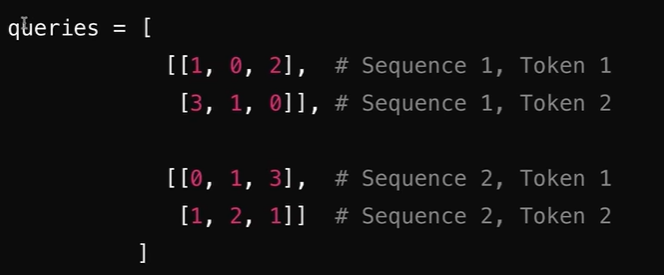 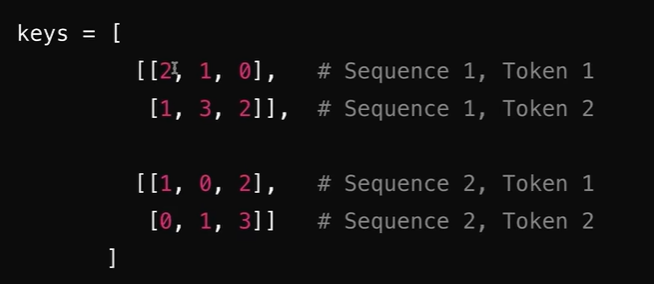

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Example of keys transpose matrix for batches which we'll get by keys.transpose(1, 2):
</div>

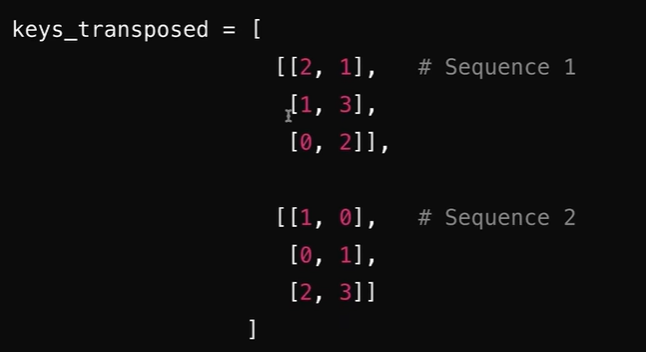 

In [49]:
class CausalAttention(nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) #New
        # context_length is equal to number of words 
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) #New
    
    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        keys = self.w_key(x)
        queries = self.w_query(x)
        values = self.w_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        # Masking the future tokens in attn_scores
        # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights) #new

        context_vec =attn_weights @ values
        return context_vec

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    The use of register_buffer in PyTorch is not strictly necessary for all use cases but offers several advantages here.<br>
    For instance, when we use the CausalAttention class in our LLM, buffers are automatically moved to the appropriate device (CPU or GPU) along with our model, which will be relevant when training the LLM in future chapters.<br>
    This means we don't need to manually ensure these tensors are on the same device as your model parameters, avoiding device mismatch errors.
</div>

In [44]:
# We can use the CausalAttention class as follows, similar to SelfAttention previously:
context_length = batch.shape[1]
print(d_in, d_out)
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print(context_vecs)

3 2
tensor([[[-0.2834, -0.2539],
         [-0.3675, -0.1289],
         [-0.3957, -0.0917],
         [-0.3571, -0.0482],
         [-0.3523, -0.0932],
         [-0.3354, -0.0407]],

        [[-0.2834, -0.2539],
         [-0.3675, -0.1289],
         [-0.3957, -0.0917],
         [-0.3571, -0.0482],
         [-0.3523, -0.0932],
         [-0.3354, -0.0407]]], grad_fn=<UnsafeViewBackward0>)


<div style="background-color: #21CC77; color: black; padding: 10px;">
    <b>Summarising Whole Process of Causal attention mechanism:</b><br>
    <ol>
        <li>Initialize <b>Wq (trainable query matrix)</b>, <b>Wk (trainable key matrix)</b> and <b>Wv (trainable value matrix)</b> matrices with random values. These are trainable weight matrices.</li>
        <li>Also we initialize a dropout and mask which will be used in further calculation while masking future words.</li>
        <li>Multiply Input matrix with Wq, Wk and Wv which are trainable weight matrices to get <b>queries</b>, <b>keys</b> and <b>values</b>. Now in further process queries, keys and values will be used to  calculate context vectors.</li>
        <li>Now queries matrix will be multiplied with transpose (transposed by keys.transpose(1, 2)) of keys matrix (dot product) to get <b>attention scores</b> for every inputs.</li>
        <li>Now attention score matrix will be masked and set to -infinity.</li>
        <li>Now to normalize attention scores, attention scores matrix will be divided by square root of dimsension of key sqrt(d_key) (To keep variance of attention weights close to 1) and then it'll be passed to softmax. Which will give <b>attention weights</b>. Here if dimension of keys matrix is 6*2 then d_keys=2. Since future attention scores for each embeddings were set to -infinity, when it's passed to softmax, those -infinity cells will become 0.</li>
        <li>Then apply dropout to attention weights to set some percentage of attention scores to 0 which is defined by self.dropout .</li>
        <li>Now multiply attention weights matrix with values matrix to get <b>context vectors</b>.</li>
    </ol>
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In the next section, we will expand on this concept and implement a multi-head attention module, that implements several of such causal attention mechanisms in parallel.
</div>

<h1>EXTENDING SINGLE HEAD ATTENTION TO MULTI-HEAD ATTENTION</h1>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    <b>The term "multi-head" refers to dividing the attention mechanism into multiple heads (each operation independently).</b>
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li>Stacking Multiple single head attention layers
            <ol>
                <li>Implementing multi-head attention involves creating multiple instances of the self attention mechanism; <u>each with it's own weights, and then combining their outputs.</u></li>
                <li>This can be computationally intensive, but it makes LLMs poweful at complex pattern recognition tasks.</li>
            </ol>
        </li>
    </ul>
</div>

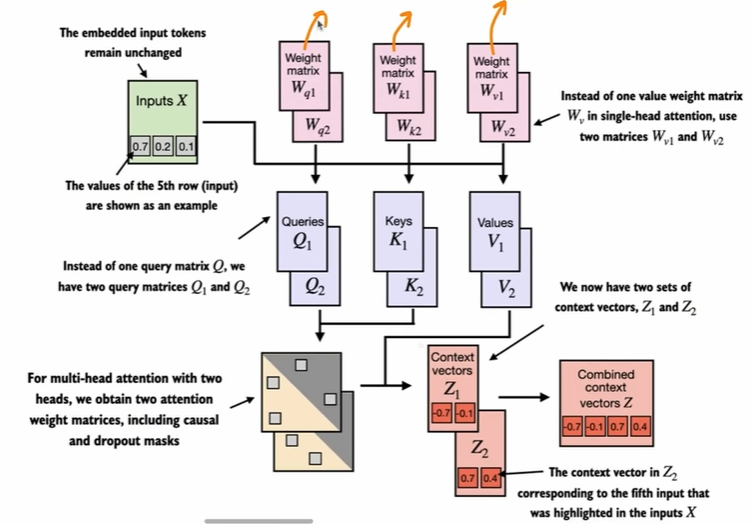 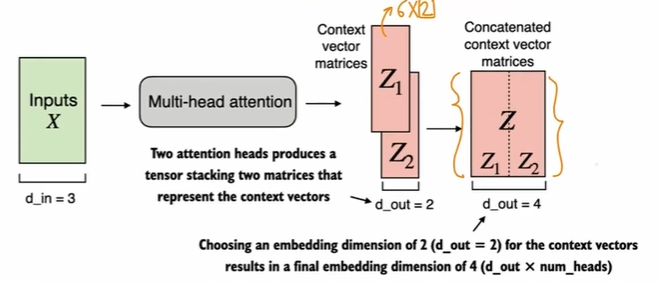

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    In practical terms, implementing multi-head attention involves creating multiple instances of the self-attention mechanism, each with its own weights, and then combining their outputs<br>
    In code, we can achieve this by implementing a simple MultiHeadAttentionWrapper class that stacks multiple instances of our previously implemented CausalAttention module:
</div>

In [47]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_biad=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_biad) for _ in range(num_heads)]
        )
    
    def forward(self, x):
        # Setting dim=-1 because we're contatinating along column
        return torch.concat([head(x) for head in self.heads], dim=-1)

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    For example, if we use this MultiHeadAttentionWrapper class with two attention heads (via num_heads=2) and CausalAttention output dimension d_out=2, this results in a 4- dimensional context vectors (d_out*num_heads=4)
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    To illustrate further with a concrete example, we can use the MultiHeadAttentionWrapper class similar to the CausalAttention class before:
</div>

In [46]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

torch.Size([2, 6, 3])


In [48]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens = 6
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li>The first dimension of the resulting context_vecs tensor is 2 since we have two input texts (the input texts are duplicated, which is why the context vectors are exactly the same for those).</li>
        <li>The second dimension refers to the 6 tokens in each input. The third dimension refers to the 4-dimensional embedding of each token.<br>
        In this section, we implemented a MultiHeadAttentionWrapper that combined multiple single-head attention modules.</li>
        <li>However, note that these are processed sequentially via [head(x) for head in self.heads] in the forward method.</li>
        <li>We can improve this implementation by processing the heads in parallel.</li>
        <li>One way to achieve this is by computing the outputs for all attention heads simultaneously via matrix multiplication, as we will explore in the next section.</li>
    </ul>
</div>

<h3>IMPLEMENTING MULTI-HEAD ATTENTION WITH WEIGHT SPLITS</h3>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Instead of maintaining two separate classes, MultiHeadAttentionWrapper and CausalAttention, we can combine both of these concepts into a single MultiHeadAttention class.<br><br>
    Also, in addition to just merging the MultiHeadAttentionWrapper with the CausalAttention code, we will make some other modifications to implement multi-head attention more efficiently.
</div>

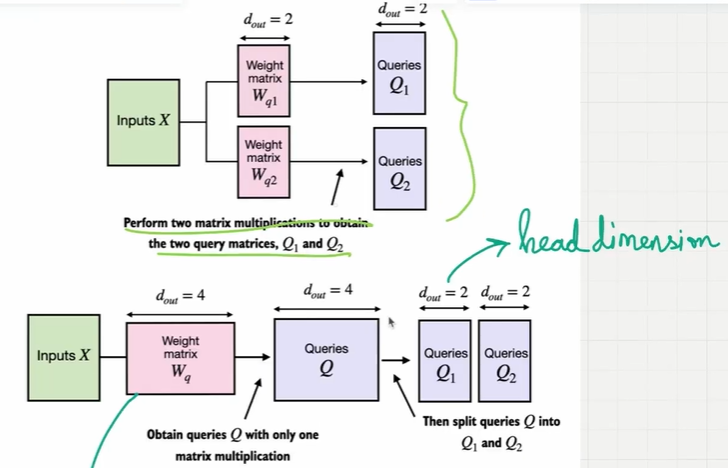

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Number of attention heads is specified. Head_Dimension=d_out/n_heads<br><br>
    In above image, you can observe that first we've calculated queries matrix and then we've split the it into matrices equal to number of heads.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li>In the MultiHeadAttentionWrapper, multiple heads are implemented by creating a list of CausalAttention objects (self.heads), each representing a separate attention head.</li>
        <li>The CausalAttention class independently performs the attention mechanism, and the results from each head are concatenated.</li>
        <li>In contrast, the following MultiHeadAttention class integrates the multi-head functionality within a single class.</li>
        <li>It splits the input into multiple heads by reshaping the projected query, key, and value tensors and then combines the results from these heads after computing attention.</li>
    </ul>
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    <b>Let's take an exmple to understand logic:</b>
    <ul>
        <li>Step 1 : Start with the input
            <ul>
                <li>Inputs b (stands for batch), num_tokesns (stands for number of words) and d_in (stands for embedding dimensions) asre taken as 1, 3 and 6.</li>
                <li>Which means out input will be a tensor with dimensions [1, 3, 6], which means we have  batch containing words and each word has 6 embedding dimensions</li>
            </ul>
        </li>
        <li>Step 2 : decide d_out, num_heads
            <ul>
                <li>d_out stands for dimension of embedding vector for each word in context_vector. num_heads stands for parallel attention heads for multihead attention mechanism.</li>
                <li>Here those values are taken as 6 (d_out) and 2(num_heads).</li>
                <li>We'll then calculate head_dim which stands for output dimension for each head.</li>
                <li>d_out=num_heads*head_dim ==> head_dim=d_out/num_heads</li>
            </ul>
        </li>
        <li>Step 3 : Initialize trainable weight matrices for key(w_key), query(w_query) and value(w_value)
            <ul>
                <li>First dimension of trainable weight matrices should be equal to last dimension of input matrix as we'll mutiply input matrix with trainable weight matrices</li>
                <li>So first dimension of trainable weight matrix will be 6</li>
                <li>Here dimesions of tarinable weight matrices will be 6*6 (d_in*d_out).</li>
            </ul>
        </li>
        <li>Step 4 : Calculate trainable keys(inputs*w_key), queries(inputs*w_query) and value(inputs*w_value) matrices
            <ul>
                <li>Dimensions of input tensor is 1*3*6 and dimension of trainable weights matrices are 6*6, so 3*6 input matrix will be multiplied by 6*6 trainable matrix</li>
                <li>So dimension of resultant keys, queries and value matrices will be 1*3*6.</li>
                <li>Here 1 is batch, 3 is number of tokens and 6 is number of columns of these matrices.</li>
            </ul>
        </li>
        <li>Step 5 : Unroll last dimension of keys, queries and values to include num_heads and head_dim
            <ul>
                <li>head_dim = d_out/num_heads = 6/2 = 3</li>
                <li>(b, num_token, d_out) ==> (b, num_toke, num_heads, head_dim) as d_out=num_heads*head_dim</li>
                <li>(1, 3, 6) ==> (1, 3, 2, 3)</li>
                <li>In (1, 3, 2, 3) ==> 1 denotes batch, 3 denotes number of words, 2 denotes number of heads and 3 denotes dimension for each head</li>
                <li>For batch 1, (3, 2, 3) means that there are 3 words and for each words there will be 2*3 keys, queries and values matrices. And in 2*3 tensor there will be 2 rows for each head as we'll process two head parallely. Each head gets 1*3 dimensional keys, queries and values matrices. </li>
                <li>This can be imagined as 2 people paying attention to all 3 tokens.</li>
            </ul>
        </li>
        <li>Step 6 : Group matrices by "number of heads"
            <ul>
                <li>Curently we can see that keys, queries and values are grouped by number of tokens (3*2*3)</li>
                <li>But as we want to process two heads parallely, those matrices should be grouped by number of heads. So we'll modify dimensions of those matrices</li>
                <li>It'll be done by tensor.transpose(1, 2) which means that dimensions at index 1 and 2 (tensor.shape = [1, 3, 2, 3]) will be transposed.</li>
                <li>(b, num_tokens, num_heads, head_dim) ==> (b, num_heads, num_tokens, head_dim) :: (1, 3, 2, 3) ==> (1, 2, 3, 3)</li>
                <li>In (1, 2, 3, 3), 1 ~ batch, 2 ~ number of heads, 3 ~ number of tokesn, 3 ~ trainable weight tensor with dimension 3.</li>
                <li>Each head will get 3*3 tensor, 1*3 trainable weight tensor for each word in 3*3 tensor.</li>
            </ul>
        </li>
        <li>Step 7 : Finding attention score (queris*keys.transpose(2, 3))
            <ul>
                <li>Now we'll calculate attention scores. Each head gets 1*3 dimensional keys and queries matrices for each tokens here.</li>
                <li>keys.transpose(2, 3) will transpose 3*3 matrix in (1, 2, 3, 3) keys tensor to make it (1, 2, 3, 3)</li>
                <li>Here dimensions remains same but now in 3*3 keys tensor for each head, now number of columns denotes number of tokens.</li>
                <li>Which means that each head will now get 3*1 keys tensor for each token insted on 1*3 tensor, to make matrix multiplication feasible that'll result into 1*1 attention score between two tokens.</li>
                <li>Resultant attention score tensor will be of dimensions (1, 2, 3, 3). In 3*3 matrix each cell stores attention score between corresponding tokens.</li>
                <li>Meaning of resultant attention score matrix with dimension (1, 2, 3, 3) ==> (batch, num_heads, num_tokens, num_tokens).</li>
            </ul> 
        </li> 
        <li>Step 8 : Finding attention weights (normalization)
            <ul>
                <li>First in each 3*3 matrix of (1, 2, 3, 3) dimensional tensor, values of upper triagle will be replaced by -infinity.</li>
                <li>Divide every single element in 3*3 matrix of(1, 2, 3, 3) dimensional tensor by sqrt(head_dim). sqrt(head_dim)=sqrt(d_out/num_heads)=sqrt(6/2)=sqrt(3).</li>
                <li>This division is essential to keep variance of attention score around 1 (To keep variance in control). By this, sum of each row becomes 1.</li>
                <li>Now this (1, 2, 3, 3) dimensional matrix will be passed to softmax.</li>
                <li>Dropout will also be applied on resultant attention attention weight matrix to prevent overfitting.</li>
            </ul>
        </li>
        <li>Step 9 : Calculate context vectors (attention weights*values)
            <ul>
                <li>context_vector = attention_weights (b, num_heads, num_tokens, num_tokens) * values (b, num_heads, num_tokens, head_dim)</li>
                <li>(num_tokens, num_tokens) matrix will be multiplied with (num_tokens, head_dim) matrix. Here columns of first matrix and rows second matrix are same so matrix multiplication is feasible.</li>
            </ul>
        </li>
        <li>Step 10 : Reform context vectors
            <ul>
                <li>(1, 2, 3, 3) dimensions of context vector tensor represents (b, num_heads, num_tokens, head_dim).</li>
                <li>Now to preserve d_out we'll have to swap dimensions. So we'll transpose (b, num_heads, num_tokens, head_dim) dimensions into (b, num_tokens, num_heads, head_dim). Which will be done by tenstor.transpose(1, 2) which transposes the dimensions at 1 and 2 index in tensor.shape ([1, 2, 3, 3]).</li>
                <li>(b, num_heads, num_tokens, head_dim) ==> (b, num_tokens, num_heads, head_dim) : (1, 2, 3, 3) ==> (1, 3, 2, 3)</li>
                <li>This means that grouping is done corresponding to tokens. In (1, 3, 2, 3), 1 is for batch, 3 represents tokens, 2 represents heads and then at last 3 columnar (1*3) matrix represents context vector for corrensponding head for respective token. </li>
            </ul>
        </li>
        <li>Step 11 : Combining heads
            <ul>
                <li>In (1, 3, 2, 3), for each 3 tokens there will be a 2*3 matrix in which each row (each head) has a 1*3 context vector matrix. So to combine two heads, these 2*3 domensional matrix will be converted into 1*3 matrix. Here all 3 cell values of both rows will be store in a single row which makes is 1*6 matrix for each 3 tokens. This is how all heads are mered</li>
                <li>If there are n heads (meaning n rows) and each head has m dimentional context vector (m columnar context vector). After merging number of columns will be n*m. </li>
                <li>(b, num_heads, num_tokens, head_dim) ==> (b, num_tokens, d_out) :: (1, 3, 2, 3) ==> (1, 3, 6)</li>
                <li>After merging output tensor dimensions will be (b, num_tokens, d_out).</li>
            </ul>
        </li>
    </ul>
</div>

In [55]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )
    
    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.w_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.w_query(x)
        values = self.w_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li>Step 1: Reduce the projection dim to match desired output dim</li>
        <li>Step 2: Use a Linear layer to combine head outputs</li>
        <li>Step 3: Tensor shape: (b, num_tokens, d_out)</li>
        <li>Step 4: We implicitly split the matrix by adding a num_heads dimension. Then we unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)</li>
        <li>Step 5: Transpose from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)</li>
        <li>Step 6: Compute dot product for each head</li>
        <li>Step 7: Mask truncated to the number of tokens</li>
        <li>Step 8: Use the mask to fill attention scores</li>
        <li>Step 9: Tensor shape: (b, num_tokens, n_heads, head_dim)</li>
        <li>Step 10: Combine heads, where self.d_out = self.num_heads * self.head_dim</li>
        <li>Step 11: Add an optional linear projection</li>
    </ul>
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    Even though the reshaping (.view) and transposing (.transpose) of tensors inside the MultiHeadAttention class looks very complicated,<br> mathematically, the MultiHeadAttention class implements the same concept as the MultiHeadAttentionWrapper earlier.
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    On a big-picture level, in the previous MultiHeadAttentionWrapper, we stacked multiple single-head attention layers that we combined into a multi-head attention layer.<br><br>
    The MultiHeadAttention class takes an integrated approach.<br><br>
    It starts with a multi-head layer and then internally splits this layer into individual attention heads
</div>

<h4>DETAILED EXPLANATION OF THE MULTI-HEAD ATTENTION CLASS (Technical)</h4>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li>The splitting of the query, key, and value tensors, is achieved through tensor reshaping and transposing operations using PyTorch's .view and .transpose methods.</li>
        <li>The input is first transformed (via linear layers for queries, keys, and values) and then reshaped to represent multiple heads.</li>
        <li>The key operation is to split the d_out dimension into num_heads and head_dim, where head_dim = d_out / num_heads.</li>
        <li>This splitting is then achieved using the .view method: a tensor of dimensions (b, num_tokens, d_out) is reshaped to dimension (b, num_tokens, num_heads, head_dim).</li>
        <li>The tensors are then transposed to bring the num_heads dimension before the num_tokens dimension, resulting in a shape of (b, num_heads, num_tokens, head_dim).</li>
        <li>This transposition is crucial for correctly aligning the queries, keys, and values across the different heads and performing batched matrix multiplications efficiently.</li>
        <li>Continuing with MultiHeadAttention, after computing the attention weights and context vectors, the context vectors from all heads are transposed back to the shape (b, num_tokens, num_heads, head_dim).</li>
        <li>These vectors are then reshaped (flattened) into the shape (b, num_tokens, d_out), effectively combining the outputs from all heads</li>
        <li>Additionally, we added a so-called output projection layer (self.out_proj) to MultiHeadAttention after combining the heads, which is not present in the CausalAttention class.</li>
        <li>This output projection layer is not strictly necessary, but it is commonly used in many LLM architectures, which is why we added it here for completeness.</li>
        <li>Even though the MultiHeadAttention class looks more complicated than the MultiHeadAttentionWrapper due to the additional reshaping and transposition of tensors, it is more efficient. he reason is that we only need one matrix multiplication to compute the keys, for instance, keys = self.W_key(x) (the same is true for the queries and values). In the MultiHeadAttentionWrapper, we needed to repeat this matrix multiplication, which is computationally one of the most expensive steps, for each attention head.</li>
    </ul>
</div>

In [57]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])


<div style="background-color: #B8B8FF; color: black; padding: 10px">
    As we can see based on the results, the output dimension is directly controlled by the d_out argument:
</div>

<div style="background-color: #B8B8FF; color: black; padding: 10px">
    <ul>
        <li>In this section, we implemented the MultiHeadAttention class that we will use in the upcoming sections when implementing and training the LLM itself.</li>
        <li>Note that while the code is fully functional, we used relatively small embedding sizes and numbers of attention heads to keep the outputs readable.</li>
        <li>For comparison, the smallest GPT-2 model (117 million parameters) has 12 attention heads and a context vector embedding size of 768.</li>
        <li>The largest GPT-2 model (1.5 billion parameters) has 25 attention heads and a context vector embedding size of 1600.</li>
        <li>Note that the embedding sizes of the token inputs and context embeddings are the same in GPT models (d_in = d_out).</li>
    </ul>
</div>

<div style="background-color: #21CC77; color: black; padding: 10px;">
    <b>Summarising Whole Process of Multo Head attention mechanism:</b><br>
    <ol>
        <li>Initialize <b>Wq (trainable query matrix)</b>, <b>Wk (trainable key matrix)</b> and <b>Wv (trainable value matrix)</b> matrices with random values. These are trainable weight matrices. Also initialize num_heads and head_dim which will be used to set keys, queries and values matrices</li>
        <li>Also we initialize a dropout and mask which will be used in further calculation while masking future words.</li>
        <li>Multiply Input matrix with Wq, Wk and Wv which are trainable weight matrices to get <b>queries</b>, <b>keys</b> and <b>values</b>. Now in further process queries, keys and values will be used to  calculate context vectors.</li>
        <li>Dimensions of keys, queries and values matrices will be (b, num_tokens, d_out).</li>
        <li>Implicitly split the keys, queries and values matrices by adding a `num_heads` dimension. Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)</li>
        <li>Transpose keys, queries and values matrices from (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim) dimensions. To make it <b>grouped by heads</b> from <b>grouped by tokens</b> state.</li>
        <li>Now queries matrices for each head will be multiplied with transpose (transposed by keys.transpose(2, 3)) of keys matrix (dot product) to get <b>attention scores</b> between every inputs words.</li>
        <li>Now attention score matrix will be masked and upper triangle of attention scores will be set to -infinity.</li>
        <li>Now to normalize attention scores, attention scores matrix will be divided by square root of dimsension of key sqrt(head_dim) (head_dim=d_out/num_heads) (To keep variance of attention weights close to 1) and then it'll be passed to softmax. Which will give <b>attention weights</b>. Since future attention scores for each embeddings were set to -infinity, when it's passed to softmax, those -infinity cells will become 0.</li>
        <li>Then apply dropout to attention weights to set some percentage of attention scores to 0 which is defined by self.dropout .</li>
        <li>Now multiply attention weights matrix with values matrix to get <b>context vectors</b>. Now again transpose context vector from dimensions (b, num_heads, num_tokens, head_dim) to dimensions (b, num_tokens, num_heads, head_dim) to again make it <b>grouped by tokens</b> from <b>grouped by heads</b> state.</li>
        <li>Combine heads to make context vector of dimension (b, num_tokens, d_out) from (b, num_tokens, num_heads, head_dim).</li>
    </ol>
</div>